In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
time_gap = pd.read_excel('evaluation_data/time_gap.xlsx') #['Offset (data  points)', 'Time Gap (s)', 'Test %', 'Train %', 'Test F1', 'Train F1', 'Epochs']

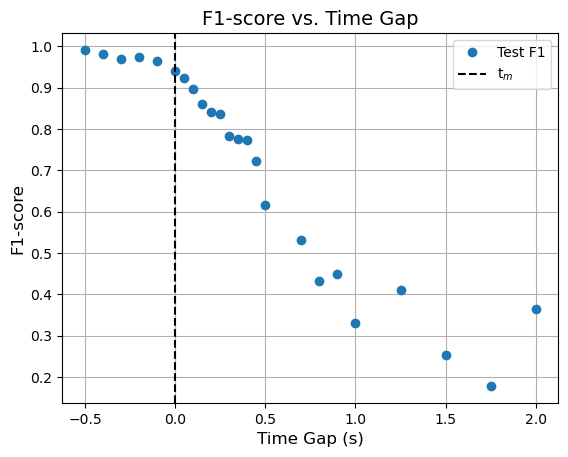

In [3]:
#plot all points that have epochs = 16
time_gap_16 = time_gap[time_gap['Epochs'] == 16]
plt.plot(time_gap_16['Time Gap (s)'], time_gap_16['Test F1'], 'o', label= 'Test F1')
#plt.plot(time_gap_16['Time Gap (s)'], time_gap_16['Train F1'], 'o', label= 'Train')
plt.xlabel('Time Gap (s)', fontsize=12)
plt.ylabel('F1-score', fontsize=12)
plt.title('F1-score vs. Time Gap', fontsize=14)
#plot vertical line at 0, name it 't_m'
plt.axvline(x=0, color='k', linestyle='--', label='t$_m$')
plt.legend()
plt.xticks()
plt.yticks()
#show a grid, every half second
plt.grid()
plt.show()

In [4]:
#load in labels.csv
labels = pd.read_csv('labels.csv') # ['name', 'maneuver', 't_peak1', 't_m', 't_peak2']
labels['t_peak1'] = pd.to_datetime(labels['t_peak1'])
labels['t_peak2'] = pd.to_datetime(labels['t_peak2'])
labels['t_m'] = pd.to_datetime(labels['t_m'])
labels['t_peak_diff'] = labels['t_peak2'] - labels['t_peak1']
labels['t_peak_diff'] = labels['t_peak_diff'].dt.total_seconds()
avg_time_diff = labels['t_peak_diff'].mean()
print('Average time difference between t_peak1 and t_peak2: {:.3f} seconds'.format(avg_time_diff))

Average time difference between t_peak1 and t_peak2: 2.504 seconds


In [5]:
#get difference between t_peak1 and t_m, and also t_m and t_peak2
labels['t_peak1_diff'] = labels['t_m'] - labels['t_peak1']
labels['t_peak1_diff'] = labels['t_peak1_diff'].dt.total_seconds()
labels['t_peak2_diff'] = labels['t_peak2'] - labels['t_m']
labels['t_peak2_diff'] = labels['t_peak2_diff'].dt.total_seconds()
#print average differences
avg_t_peak1_diff = labels['t_peak1_diff'].mean()
avg_t_peak2_diff = labels['t_peak2_diff'].mean()
print('Average time difference between t_peak1 and t_m: {:.3f} seconds'.format(avg_t_peak1_diff))
print('Average time difference between t_m and t_peak2: {:.3f} seconds'.format(avg_t_peak2_diff))

Average time difference between t_peak1 and t_m: 0.357 seconds
Average time difference between t_m and t_peak2: 2.147 seconds


C:\Users\gijsd\AppData\Local\Temp\ipykernel_1100\917067431.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap(c)


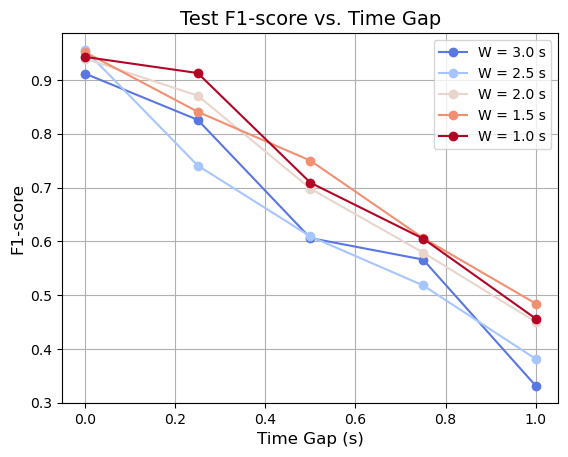

In [6]:
GW = pd.read_excel('evaluation_data/time_gap_and_window_size.xlsx') #['Offset (data  points)', 'Time Gap (s)', 'W (data points)', 'W (s)','Test %', 'Train %', 'Test F1', 'Train F1', 'Comments']
window_sizes = GW['W (s)'].unique()
c = 'coolwarm'
color_map = plt.cm.get_cmap(c)
colors = color_map(np.linspace(0.1, 1, len(window_sizes)))
# For each window size, plot the F1-score vs. time gap
for i, w in enumerate(window_sizes):
    GW_w = GW[GW['W (s)'] == w]
    plt.plot(GW_w['Time Gap (s)'], GW_w['Test F1'], '-o', label='W = {} s'.format(w), color=colors[i])

plt.xlabel('Time Gap (s)', fontsize=12)
plt.ylabel('F1-score', fontsize=12)
plt.title('Test F1-score vs. Time Gap', fontsize=14)
plt.legend()
plt.grid()
plt.show()

C:\Users\gijsd\AppData\Local\Temp\ipykernel_1100\3588588491.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap(c)


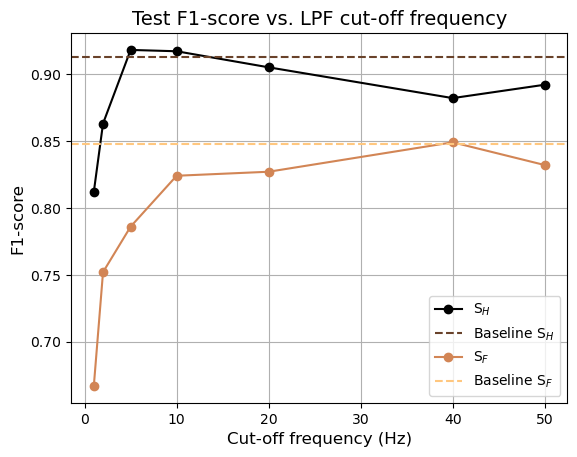

In [7]:
LPF = pd.read_excel('evaluation_data/lpf.xlsx') #['Sensor', 'cut-off (Hz)', 'Test %', 'Train %', 'Test F1', 'Train F1', 'Comments']
sensors = LPF['Sensor'].unique()

c = 'copper'
color_map = plt.cm.get_cmap(c)
colors = color_map(np.linspace(0, 1, 4))
i = 0
for s in sensors:
    if s == 'S_H':
        label1 = 'S$_H$'
        label2 = 'Baseline S$_H$'
    elif s == 'S_F':
        label1 = 'S$_F$'
        label2 = 'Baseline S$_F$'
    LPF_s = LPF[LPF['Sensor'] == s]
    plt.plot(LPF_s[LPF_s['cut-off (Hz)'] != 999]['cut-off (Hz)'], LPF_s[LPF_s['cut-off (Hz)'] != 999]['Test F1'], '-o', label=label1, color=colors[i])
    test_f1_value = LPF_s[LPF_s['cut-off (Hz)'] == 999]['Test F1'].values[0]
    if s == 'S_H':
        raw_phone_f1 = test_f1_value
    plt.axhline(y=test_f1_value, color=colors[i+1], linestyle='--', label=label2)
    i += 2
plt.xlabel('Cut-off frequency (Hz)', fontsize=12)
plt.ylabel('F1-score', fontsize=12)
plt.title('Test F1-score vs. LPF cut-off frequency', fontsize=14)
plt.legend()
plt.grid()
plt.show()

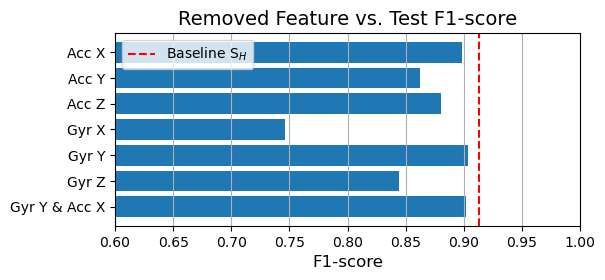

In [8]:
LOFO = pd.read_excel('evaluation_data/leave_one_feature_out.xlsx') #['Features', 'Removed feature', 'Test %', 'Train %', 'Test F1','Train F1', 'Comments']

LOFO = LOFO.sort_values(by='Removed feature', ascending=False)
#swap first two rows in LOFO
LOFO.iloc[[0, 1]] = LOFO.iloc[[1, 0]]
#Make horizontal bar plot, with 'Removed feature' on y-axis, and 'Test F1' on x-axis.
plt.figure(figsize=(6, 2.5))
plt.barh(LOFO['Removed feature'], LOFO['Test F1'])
#move y label to the right
#plt.tick_params(axis='y', labelright=True, labelleft = False)
plt.xlabel('F1-score', fontsize=12)
#plt.ylabel('Removed feature', fontsize=12)
plt.title('Removed Feature vs. Test F1-score', fontsize=14)

#include on vertical grid lines
plt.grid(axis='x')
plt.axvline(x=raw_phone_f1, color='r', linestyle='--', label='Baseline S$_H$')
plt.legend(loc = 'upper left')
plt.xlim([0.6, 1])
plt.show()

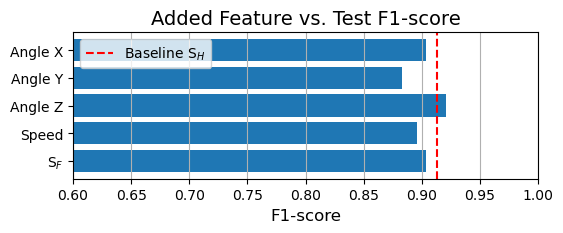

In [10]:
#%matplotlib qt

EF = pd.read_excel('evaluation_data/extra_features.xlsx') #['Features', 'Added Feature', 'Test %', 'Train %', 'Test F1', 'Train F1','Comments']
EF = EF.sort_values('Added Feature', ascending=False)
EF['Added Feature'] = EF['Added Feature'].replace('Thingy IMU', 'S$_F$')

plt.figure(figsize=(6, 1.9))
plt.barh(EF['Added Feature'], EF['Test F1'])
plt.xlabel('F1-score', fontsize=12)
#plt.ylabel('Added feature', fontsize=12)
plt.title('Added Feature vs. Test F1-score', fontsize=14)
plt.grid(axis='x')
plt.axvline(x=raw_phone_f1, color='r', linestyle='--', label='Baseline S$_H$')
plt.legend(loc = 'upper left')
plt.xlim([0.6, 1])
plt.show()
